![](images/18_01.png)

In [1]:
library(corrplot)

corrplot 0.90 loaded



In [2]:
mydata = read.csv("./data/birthweight_reduced.csv", stringsAsFactors=T)

In [3]:
str(mydata)

'data.frame':	42 obs. of  17 variables:
 $ id              : int  1313 431 808 300 516 321 1363 575 822 1081 ...
 $ headcirumference: int  12 12 13 12 13 13 12 12 13 14 ...
 $ length          : int  17 19 19 18 18 19 19 19 19 21 ...
 $ Birthweight     : num  5.8 4.2 6.4 4.5 5.8 6.8 5.2 6.1 7.5 8 ...
 $ Gestation       : int  33 33 34 35 35 37 37 37 38 38 ...
 $ smoker          : int  0 1 0 1 1 0 1 1 0 0 ...
 $ motherage       : int  24 20 26 41 20 28 20 19 20 18 ...
 $ mnocig          : int  0 7 0 7 35 0 7 7 0 0 ...
 $ mheight         : int  58 63 65 65 67 62 64 65 62 67 ...
 $ mppwt           : int  99 109 140 125 125 118 104 132 103 109 ...
 $ fage            : int  26 20 25 37 23 39 20 20 22 20 ...
 $ fedyrs          : int  16 10 12 14 12 10 10 14 14 12 ...
 $ fnocig          : int  0 35 25 25 50 0 35 0 0 7 ...
 $ fheight         : int  66 71 69 68 73 67 73 72 70 67 ...
 $ lowbwt          : int  1 1 0 1 1 0 1 0 0 0 ...
 $ mage35          : int  0 0 0 1 0 0 0 0 0 0 ...
 $ LowBirthWei

In [4]:
summary(mydata)

       id         headcirumference     length       Birthweight    
 Min.   :  27.0   Min.   :12.00    Min.   :17.00   Min.   : 4.200  
 1st Qu.: 537.2   1st Qu.:13.00    1st Qu.:19.00   1st Qu.: 6.450  
 Median : 821.0   Median :13.00    Median :20.00   Median : 7.250  
 Mean   : 894.1   Mean   :13.26    Mean   :19.93   Mean   : 7.264  
 3rd Qu.:1269.5   3rd Qu.:14.00    3rd Qu.:21.00   3rd Qu.: 8.000  
 Max.   :1764.0   Max.   :15.00    Max.   :22.00   Max.   :10.000  
   Gestation         smoker         motherage         mnocig      
 Min.   :33.00   Min.   :0.0000   Min.   :18.00   Min.   : 0.000  
 1st Qu.:38.00   1st Qu.:0.0000   1st Qu.:20.25   1st Qu.: 0.000  
 Median :39.50   Median :1.0000   Median :24.00   Median : 4.500  
 Mean   :39.19   Mean   :0.5238   Mean   :25.55   Mean   : 9.429  
 3rd Qu.:41.00   3rd Qu.:1.0000   3rd Qu.:29.00   3rd Qu.:15.750  
 Max.   :45.00   Max.   :1.0000   Max.   :41.00   Max.   :50.000  
    mheight         mppwt            fage          fedy

In [5]:
dim(mydata)

[1] 42 17

In [6]:
head(mydata)

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
2,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
3,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
4,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
5,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low
6,321,13,19,6.8,37,0,28,0,62,118,39,10,0,67,0,0,Normal


In [7]:
library(Amelia)

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



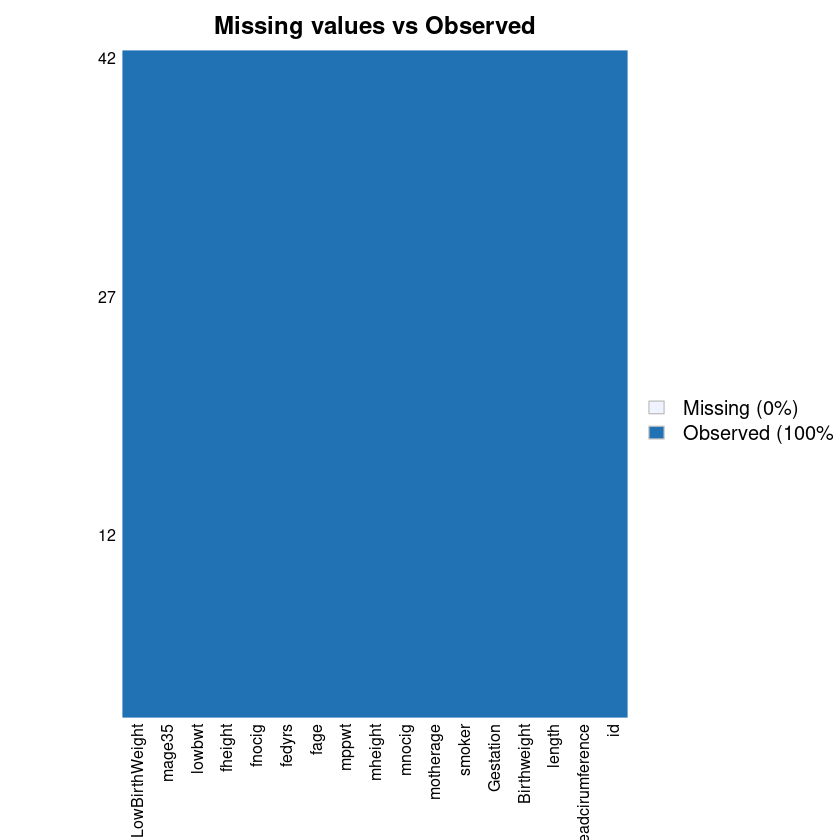

In [8]:
missmap(mydata, main = "Missing values vs Observed")

In [9]:
table(mydata$LowBirthWeight)


   Low Normal 
     6     36 

In [10]:
correlations = cor(mydata[, 2:16])
correlations

,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
headcirumference,1.000000000,0.56532849,0.736396310,0.443974538,-0.17375085,0.112108327,-0.131437996,0.38129342,0.35759351,0.30136346,0.083416559,-0.02773428,0.040466392,-0.50024673,-0.005096869
length,0.565328491,1.00000000,0.697008279,0.651402769,-0.23534939,-0.020718949,-0.157138028,0.41473145,0.30439408,0.07890718,-0.050722880,0.01971581,0.187137302,-0.59224820,0.021074827
Birthweight,0.736396310,0.69700828,1.000000000,0.706291950,-0.30895001,0.001040475,-0.151227745,0.36794704,0.38958065,0.17679000,0.073869580,-0.08892720,0.024784274,-0.65180447,-0.108480485
Gestation,0.443974538,0.65140277,0.706291950,1.000000000,-0.09474608,0.010778455,0.043194856,0.23092930,0.25051553,0.14217533,0.130986636,-0.11383061,0.187866905,-0.60293498,0.007394508
smoker,-0.173750846,-0.23534939,-0.308950015,-0.094746078,1.00000000,0.212478786,0.727218092,0.03968201,0.01258798,0.19750145,-0.014890584,0.41763296,0.105835307,0.25301216,0.146938453
motherage,0.112108327,-0.02071895,0.001040475,0.010778455,0.21247879,1.000000000,0.340294378,0.04678404,0.27764134,0.80658442,0.441682660,0.09092664,-0.203603248,-0.07639372,0.692663889
mnocig,-0.131437996,-0.15713803,-0.151227745,0.043194856,0.72721809,0.340294378,1.000000000,0.17194248,0.15400811,0.24842538,0.198526204,0.25730739,0.008421145,0.03538366,0.290574154
mheight,0.381293418,0.41473145,0.367947042,0.230929298,0.03968201,0.046784040,0.171942477,1.00000000,0.67124662,-0.07166439,0.016249430,0.04909595,0.272823984,-0.20080064,0.108944153
mppwt,0.357593509,0.30439408,0.389580646,0.250515534,0.01258798,0.277641336,0.154008114,0.67124662,1.00000000,0.25340070,0.187700894,0.05077141,0.108319605,-0.33887910,0.147704096
fage,0.301363456,0.07890718,0.176790000,0.142175334,0.19750145,0.806584417,0.248425377,-0.07166439,0.25340070,1.00000000,0.300471472,0.13586202,-0.298559496,-0.24509537,0.351405036


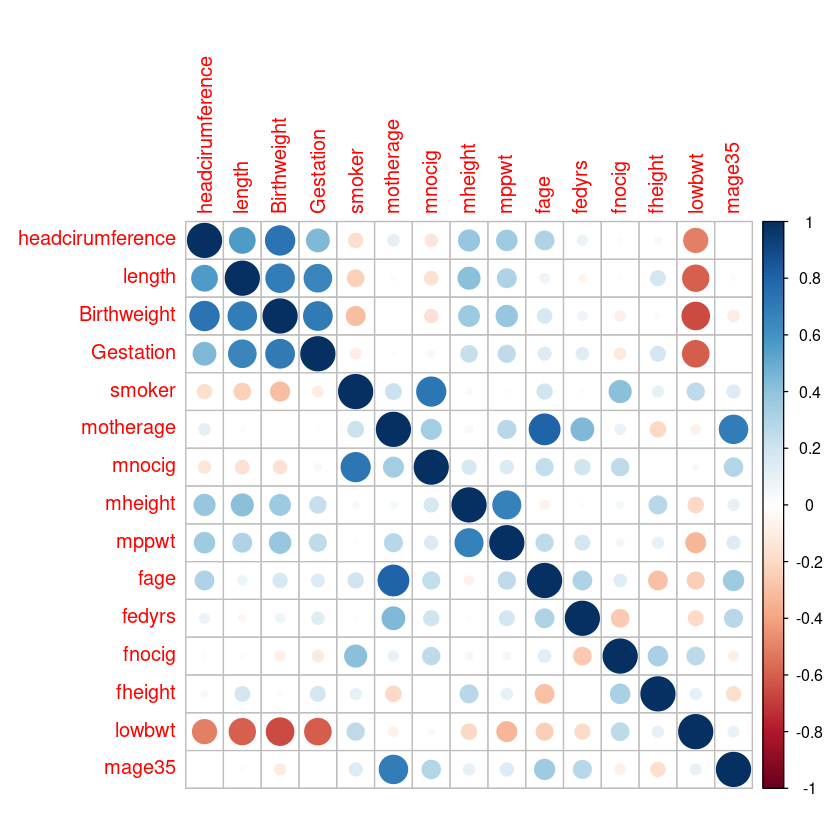

In [11]:
corrplot(correlations, method = 'circle')

In [12]:
mydata = mydata[, 2:17]
head(mydata)

,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
2,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
3,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
4,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
5,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low
6,13,19,6.8,37,0,28,0,62,118,39,10,0,67,0,0,Normal


In [13]:
n = nrow(mydata)
trainIndex = sample(1:n, size = round(0.7 * n), replace = FALSE)
train = mydata[trainIndex,]
test = mydata[-trainIndex,]

In [14]:
mylogit = glm(LowBirthWeight ~ ., data = train, family = 'binomial')

In [16]:
summary(mylogit)


Call:
glm(formula = LowBirthWeight ~ ., family = "binomial", data = train)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-3.971e-06   3.971e-06   3.971e-06   3.971e-06   3.971e-06  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)       2.557e+01  2.111e+06       0        1
headcirumference  5.245e-07  9.722e+04       0        1
length           -5.655e-07  9.373e+04       0        1
Birthweight       2.503e-07  8.605e+04       0        1
Gestation        -1.427e-07  3.929e+04       0        1
smoker           -2.779e-07  1.726e+05       0        1
motherage        -3.252e-07  3.544e+04       0        1
mnocig            4.285e-08  6.192e+03       0        1
mheight          -1.379e-07  3.488e+04       0        1
mppwt             9.275e-09  4.082e+03       0        1
fage              2.112e-07  2.113e+04       0        1
fedyrs           -8.836e-10  2.909e+04       0        1
fnocig           -2.163e-09  4.726e+0

In [17]:
pred = predict(mylogit, newdata = test, type = 'response')
pred_value = ifelse(pred > .5, "Normal", "Low")

result = data.frame(Actual = test$LowBirthWeight, pred_value)

result

,Actual,pred_value
,<fct>,<chr>
1,Low,Low
5,Low,Low
11,Normal,Normal
14,Normal,Normal
15,Normal,Normal
24,Normal,Normal
26,Normal,Normal
28,Normal,Normal
34,Normal,Normal


In [18]:
1 - mean(pred_value != test$LowBirthWeight)

[1] 1

In [20]:
y1 = predict(mylogit, newdata = data.frame(
        headcirumference = c(12),
        length = c(18),
        Birthweight = c(4.5),
        Gestation = c(35),
        smoker = c(1), 
        motherage = c(41), 
        mnocig = c(7), 
        mheight = c(65), 
        mppwt = c(125), 
        fage = c(37),
        fedyrs = c(14), 
        fnocig = c(25),
        fheight = c(68), 
        lowbwt = c(1), 
        mage35 = c(1)), type = 'response')

y1 = ifelse(y1 > .5, 1, 0)

y1

1 
0